# **Taller Operaciones Morfologicas PDI**

*   Brian Patiño Agudelo
*   Juan Daniel Gonzalez

In [1]:
def load_data(FILEID):
    #FILEID es la identificación de un archivo .zip en mi drive con permisos para cualquiera que posea el ID
    ## dicho ID se encuentra en celdas más abajo.
    #Se carga, descomprime y finalmente guarda en la variable Data el conjunto de datos.
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O parches.zip && rm -rf /tmp/cookies.txt
    !unzip parches.zip
    !dir

    #Data=df.read_csv('/content/UpdatedResumeDataSet.csv')

In [2]:
load_data('1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY')

--2024-03-09 03:53:10--  https://docs.google.com/uc?export=download&confirm=&id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY
Resolving docs.google.com (docs.google.com)... 74.125.134.101, 74.125.134.113, 74.125.134.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.134.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY&export=download [following]
--2024-03-09 03:53:10--  https://drive.usercontent.google.com/download?id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.213.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18197214 (17M) [application/octet-stream]
Saving to: ‘parches.zip’

parches.zip         100%[===================>]  17.35M  --.-K

In [3]:
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
import matplotlib.pylab as pylab
import numpy as np
from scipy import ndimage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from skimage.transform import resize
import cv2 as cv


path='/content/images/'

### Ejercicio 1
Crea un algoritmo que identifique y separe cada uno de los objetos presentes en la siguiente imagen, objeto en color blanco y fondo de color negro:

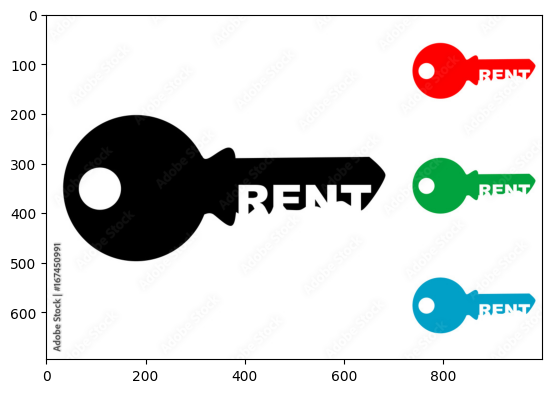

In [4]:
im1=mpimg.imread(path+'llaves.jpg')
plt.imshow(im1)

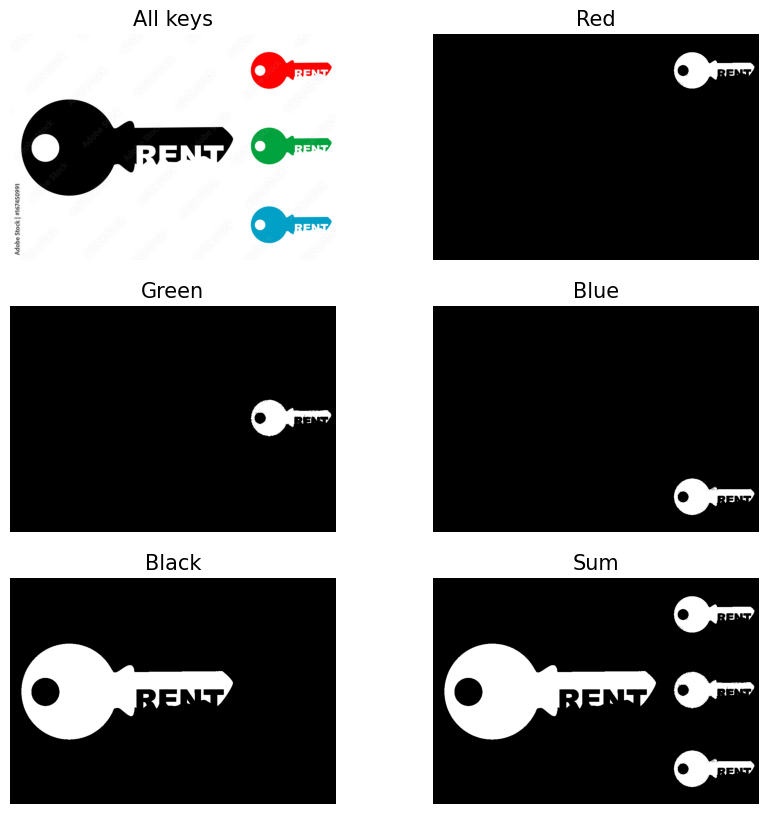

In [5]:
# Red Key

red = im1.copy()

mask_red = ((red[:,:,0] >= 240) & (red[:,:,0] <= 255))
mask_green = ((red[:,:,1] >= 0) & (red[:,:,1] < 20))
mask_azul = ((red[:,:,2] >= 0) & (red[:,:,2] < 30))

red[mask_azul & mask_green & mask_red] = 255
red[~mask_azul | ~mask_green | ~mask_red] = 0

# Green Key

green = im1.copy()

mask_red = ((green[:,:,0] >= 0) & (green[:,:,0] < 20))
mask_azul = ((green[:,:,2] >= 55) & (green[:,:,2] < 120))

green[mask_azul & mask_red] = 255
green[~mask_azul | ~mask_red] = 0

# Blue Key

blue = im1.copy()

mask_green = ((blue[:,:,1] >= 140) & (blue[:,:,1] < 170))
mask_blue = ((blue[:,:,2] >= 190) & (blue[:,:,2] < 240))

blue[mask_blue & mask_green] = 255
blue[~mask_blue | ~mask_green] = 0

# Black Key

black = rgb2gray(imread(path+'llaves.jpg'))
black = black < 0.1
black = gray2rgb(black).astype(int)*255
full_image = red+black+blue+green


pylab.figure(figsize=(10,10))
pylab.subplot(321), pylab.imshow(im1), pylab.title('All keys', size=15),
pylab.axis('off')
pylab.subplot(322), pylab.imshow(red), pylab.title('Red', size=15),
pylab.axis('off')
pylab.subplot(323), pylab.imshow(green), pylab.title('Green', size=15),
pylab.axis('off')
pylab.subplot(324), pylab.imshow(blue), pylab.title('Blue', size=15),
pylab.axis('off')
pylab.subplot(325), pylab.imshow(black), pylab.title('Black', size=15), pylab.axis('off')
pylab.subplot(326), pylab.imshow(full_image), pylab.title('Sum', size=15), pylab.axis('off')
pylab.axis('off')
pylab.show()

## Ejercicio 2

Diseña una clase que acepte una imagen en formato RGB y aplique manualmente las siguientes transformaciones:
1. Conversión de RGB a HSV.
2. Conversión de RGB a CMYK.

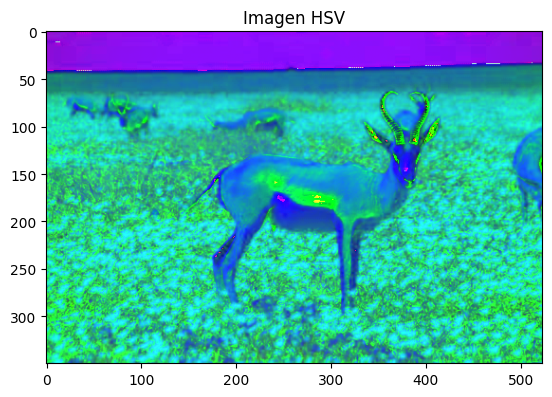

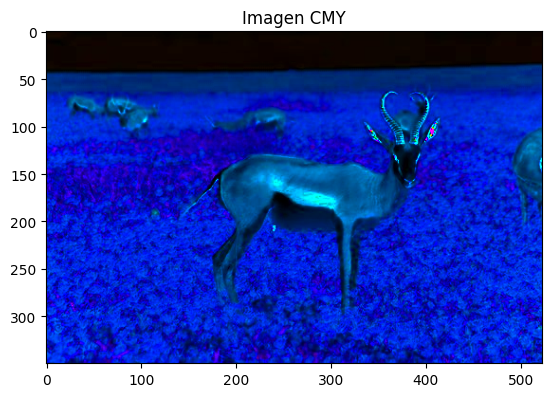

In [6]:
class ImageTransformer:
    def __init__(self, image):
        self.image = image

    def rgb_to_hsv(self):
        # Normalizar los valores de RGB a [0, 1]
        image = self.image.astype('float') / 255.0
        # Obtener componentes individuales
        r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
        # Cálculo de min y max por pixel
        max_val = np.max(image, axis=2)
        min_val = np.min(image, axis=2)
        diff = max_val - min_val

        # Inicializar H, S, V
        h = np.zeros_like(max_val)
        s = np.zeros_like(max_val)
        v = max_val

        # Evitar división por cero
        diff[diff == 0] = 1

        # Obtener H, componentes basados en qué valor RGB es el max
        h[max_val == r] = (60 * ((g[max_val == r] - b[max_val == r]) / diff[max_val == r]) + 360) % 360
        h[max_val == g] = (60 * ((b[max_val == g] - r[max_val == g]) / diff[max_val == g]) + 120) % 360
        h[max_val == b] = (60 * ((r[max_val == b] - g[max_val == b]) / diff[max_val == b]) + 240) % 360

        # Obtener S
        s[max_val != 0] = diff[max_val != 0] / max_val[max_val != 0]

        # Convertir H, S y V a escala de 0 a 1
        h = ((h % 360) / 360).astype('float')
        s = s.astype('float')
        v = v.astype('float')

        # Combinar H, S y V en una imagen HSV
        hsv_image = np.stack((h, s, v), axis=-1)

        return hsv_image

    def rgb_to_cmyk(self):
        # Normalizar los valores de RGB a [0, 1]
        image = self.image.astype('float') / 255.0
        # Obtener componentes inversos de los colores RGB
        k = 1 - np.max(image, axis=2)
        c = (1 - image[:, :, 0] - k) / (1 - k + 1e-6)
        m = (1 - image[:, :, 1] - k) / (1 - k + 1e-6)
        y = (1 - image[:, :, 2] - k) / (1 - k + 1e-6)

        # Evitar división por cero en los casos donde K es 1
        c[k == 1] = 0
        m[k == 1] = 0
        y[k == 1] = 0

        # Combinar C, M, Y y K en una imagen CMYK
        cmyk_image = np.stack((c, m, y, k), axis=-1)

        return cmyk_image

# Probar la clase

transformer = mpimg.imread(path+'antelops.jpeg')
plt.imshow(transformer)
image_transformer = ImageTransformer(transformer)

# Convertir la imagen de RGB a HSV
hsv_image = image_transformer.rgb_to_hsv()

# Convertir la imagen de RGB a CMYK
cmyk_image = image_transformer.rgb_to_cmyk()

# Visualizar la imagen HSV
plt.imshow(hsv_image)
plt.title('Imagen HSV')
plt.show()

# Para visualizar la imagen CMYK, es necesario convertirla a RGB porque plt.imshow no admite imágenes CMYK directamente.
# Por simplicidad, vamos a visualizar solo los tres primeros canales de CMYK, que serían CMY.
plt.imshow(cmyk_image[:, :, :3])
plt.title('Imagen CMY')
plt.show()



## Ejercicio 3
Desarrolla una clase que acepte una imagen y realice las siguientes transformaciones de forma manual:

1. Escalado de la imagen.
2. Cambio de tamaño de la imagen.



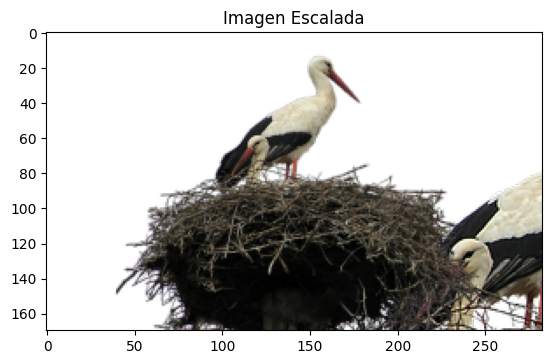

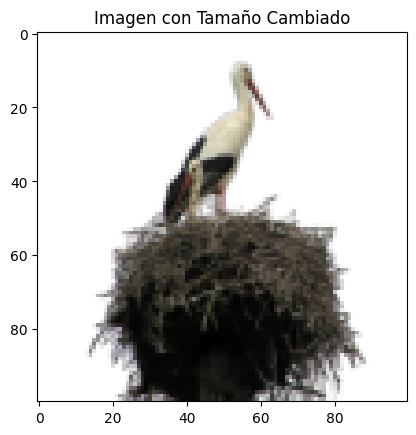

In [7]:
class ImageProcessor:
    def __init__(self, image):
        self.image = image

    def scale_image(self, scale_factor):
        """
        Escala la imagen por un factor dado.
        Si scale_factor < 1, la imagen se reduce; si scale_factor > 1, la imagen se agranda.
        """
        # Calcular nuevas dimensiones
        new_height = int(self.image.shape[0] * scale_factor)
        new_width = int(self.image.shape[1] * scale_factor)

        # Redimensionar imagen
        scaled_image = resize(self.image, (new_height, new_width), anti_aliasing=True)
        return scaled_image

    def resize_image(self, new_size):
        """
        Cambia el tamaño de la imagen a las nuevas dimensiones (new_size).
        new_size debe ser una tupla o lista de dos elementos: (new_height, new_width).
        """
        resized_image = resize(self.image, new_size, anti_aliasing=True)
        return resized_image

Imagen1 = mpimg.imread(path+'birds.png')
plt.imshow(Imagen1)
processor = ImageProcessor(Imagen1)

# Escalar la imagen por un factor de 0.5
scaled_image = processor.scale_image(0.5)

# Cambiar el tamaño de la imagen a 100x100 píxeles
resized_image = processor.resize_image((100, 100))

# Visualizar la imagen escalada
plt.imshow(scaled_image)
plt.title('Imagen Escalada')
plt.show()

# Visualizar la imagen con tamaño cambiado
plt.imshow(resized_image)
plt.title('Imagen con Tamaño Cambiado')
plt.show()

## Ejercicio 4

Reproduce los procesos enseñados en clase utilizando la biblioteca [Opencv](https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html). Aplica las mismas transformaciones usando las funciones proporcionadas por la librería.)


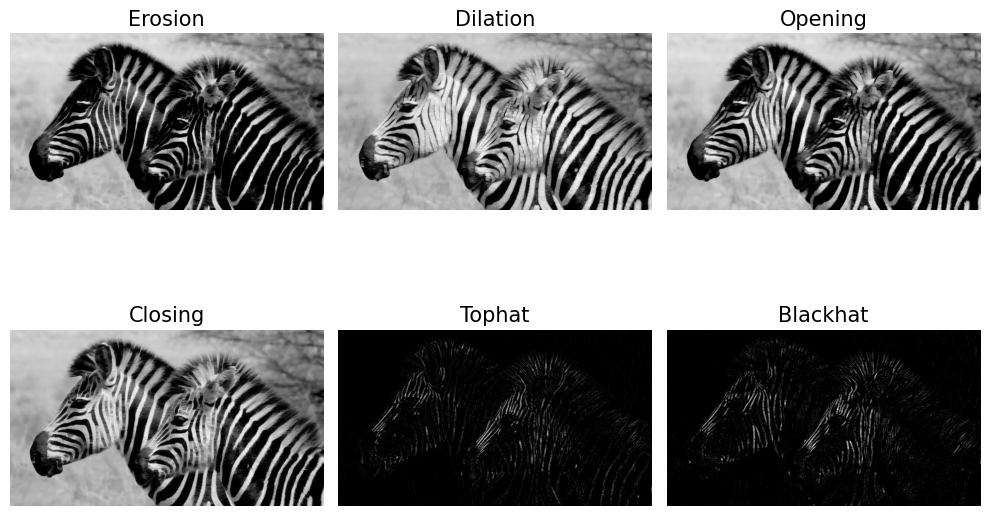

In [8]:
# Erosion
img_cv = cv.imread(path +'zebras.jpg', cv.IMREAD_GRAYSCALE)
assert img_cv is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((1,5),np.uint8)
erosion = cv.erode(img_cv,kernel,iterations=1)

# Dilation
dilation = cv.dilate(img_cv, kernel, iterations = 1)


# Opening
opening = cv.morphologyEx(img_cv, cv.MORPH_OPEN, kernel)

# Closing
closing = cv.morphologyEx(img_cv, cv.MORPH_CLOSE, kernel)

# Top Hat
tophat = cv.morphologyEx(img_cv, cv.MORPH_TOPHAT, kernel)

# Black hat
blackhat = cv.morphologyEx(img_cv, cv.MORPH_BLACKHAT, kernel)


pylab.figure(figsize=(10,7))
# Erosion
pylab.subplot(231), pylab.imshow(erosion, cmap='gray'), pylab.title('Erosion', size=15)
pylab.axis('off')

# Dilation
pylab.subplot(232), pylab.imshow(dilation, cmap='gray'), pylab.title('Dilation', size=15)
pylab.axis('off')

# Opening
pylab.subplot(233), pylab.imshow(opening, cmap='gray'), pylab.title('Opening', size=15)
pylab.axis('off')

# Closing
pylab.subplot(234), pylab.imshow(closing, cmap='gray'), pylab.title('Closing', size=15)
pylab.axis('off')

# Top Hat
pylab.subplot(235), pylab.imshow(tophat, cmap='gray'), pylab.title('Tophat', size=15)
pylab.axis('off')

# Black Hat
pylab.subplot(236), pylab.imshow(blackhat, cmap='gray'), pylab.title('Blackhat', size=15)
pylab.axis('off')

pylab.tight_layout()
pylab.show()

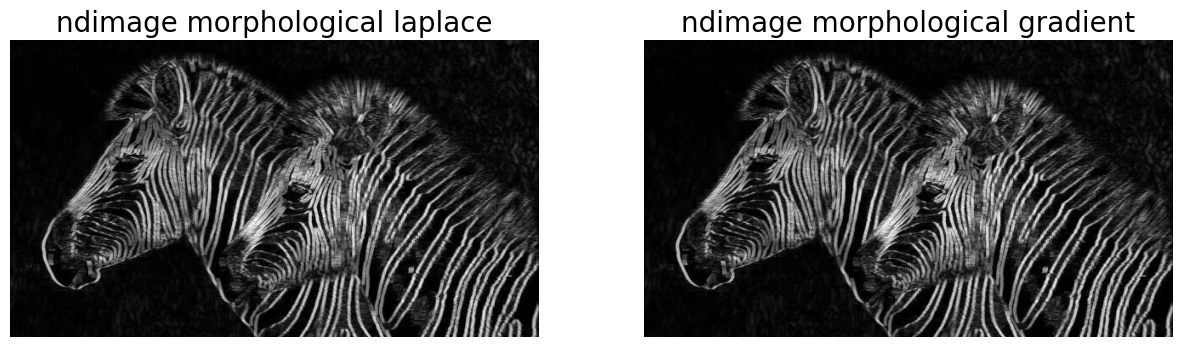

In [9]:
# Morphological Gradient
gradient = cv.morphologyEx(img_cv, cv.MORPH_GRADIENT, kernel)

dilatacion = cv.dilate(img_cv, kernel, iterations=1)
erosion = cv.erode(img_cv, kernel, iterations=1)

# Calcular la diferencia entre la dilatación y erosión como aproximación
laplaciano_morfologico_aprox = dilatacion - erosion

pylab.figure(figsize=(15,10))
pylab.subplot(121), pylab.title('ndimage morphological laplace', size=20), pylab.imshow(laplaciano_morfologico_aprox, cmap="gray")
pylab.axis('off')
pylab.subplot(122), pylab.title('ndimage morphological gradient', size=20),
pylab.imshow(gradient, cmap="gray")
pylab.axis('off')
pylab.show()

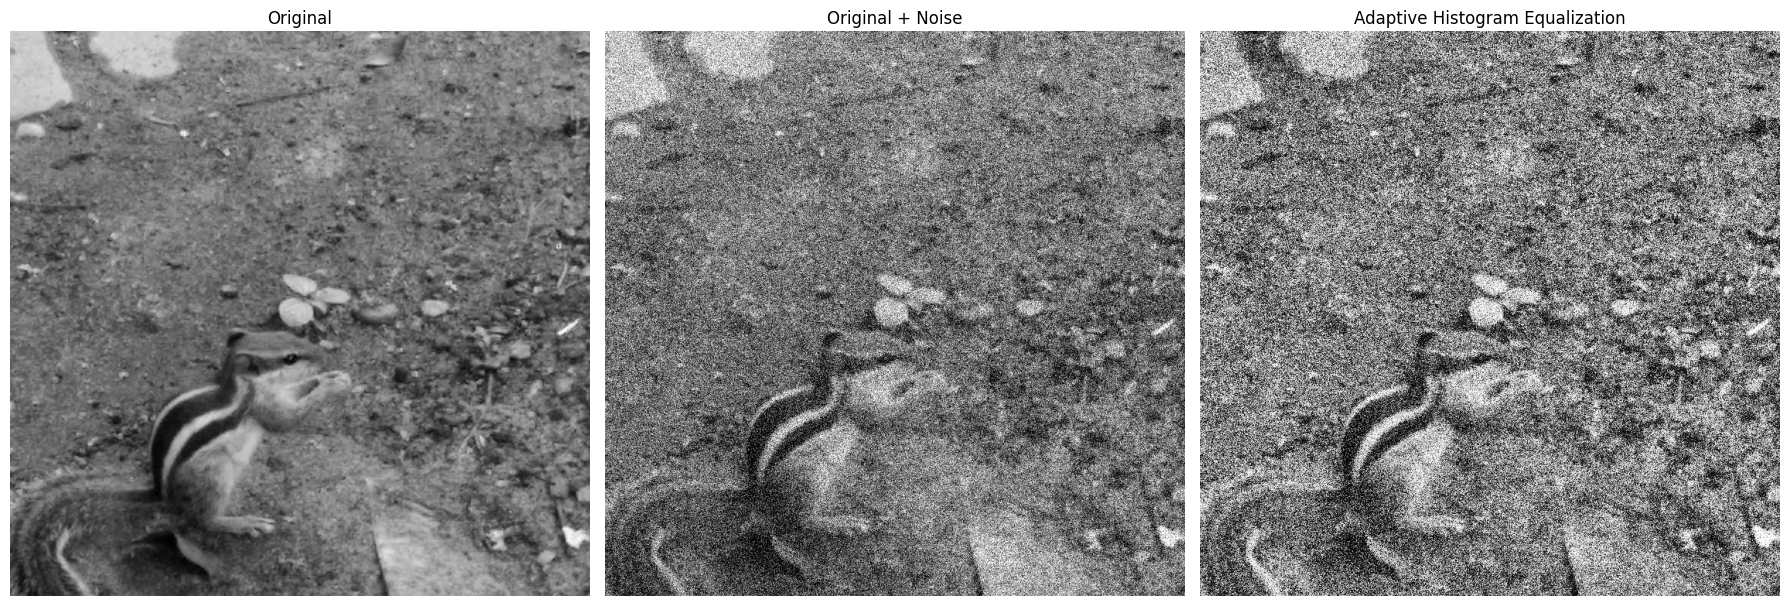

In [10]:
image = rgb2gray(imread(path+'squirrel.jpg'))
sigma = 0.2
noisy_image = np.clip(image + sigma * np.random.standard_normal(image.shape), 0, 1)
noisy_image_uint8 = np.clip(noisy_image * 255, 0, 255).astype('uint8')

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
imagen_clahe = clahe.apply(noisy_image_uint8)

imagen_clahe_plt = imagen_clahe.astype('float32') / 255

fig, axes = plt.subplots(1, 3, figsize=(18, 7), sharex=True, sharey=True)
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title('Original + Noise')
axes[2].imshow(imagen_clahe_plt, cmap='gray')
axes[2].set_title('Adaptive Histogram Equalization')

for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

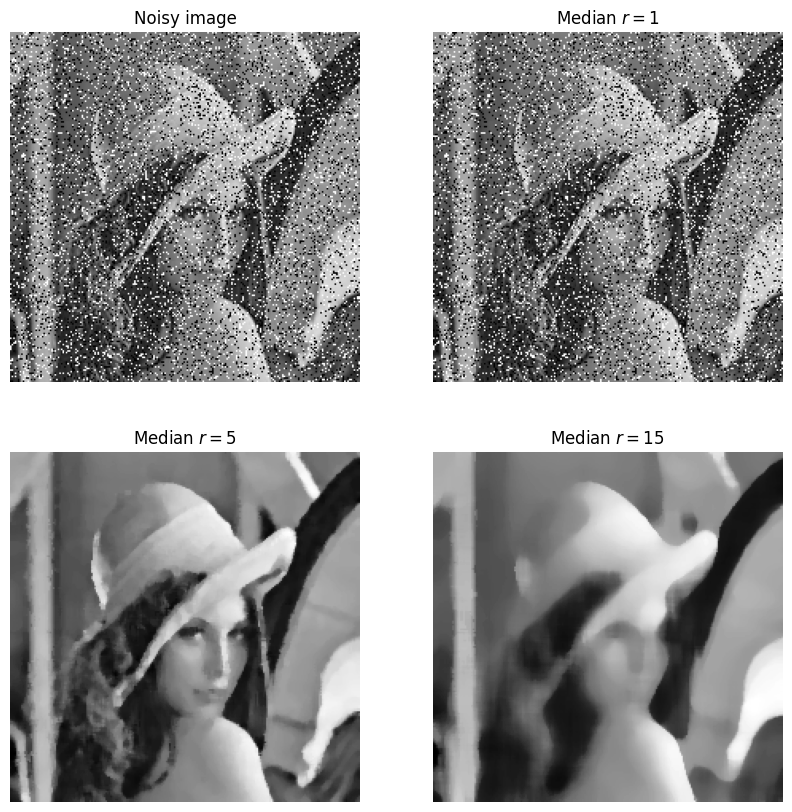

In [11]:
noisy_image = (rgb2gray(imread(path+'lena.jpg'))*255).astype(np.uint8)
noise = np.random.random(noisy_image.shape)
noisy_image[noise > 0.9] = 255
noisy_image[noise < 0.1] = 0

fig, axes = pylab.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axes1, axes2, axes3, axes4 = axes.ravel()

def plot_gray_image(ax, image, title):
    ax.imshow(image, cmap=pylab.cm.gray),
    ax.set_title(title), ax.axis('off')
    #ax.set_adjustable('box-forced')


plot_gray_image(axes1, noisy_image, 'Noisy image')
plot_gray_image(axes2, cv.medianBlur(noisy_image, 1), 'Median $r=1$')
plot_gray_image(axes3, cv.medianBlur(noisy_image, 5), 'Median $r=5$')
plot_gray_image(axes4, cv.medianBlur(noisy_image, 15), 'Median $r=15$')

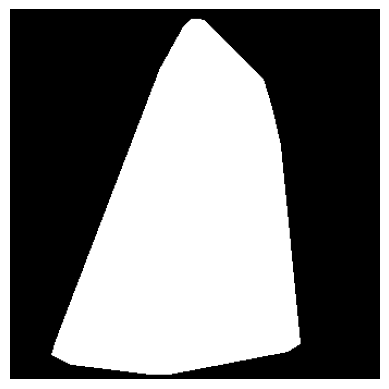

In [12]:
img = imread(path+'horse-dog.jpg')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, binary = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
hull_image = np.zeros_like(binary)

for contour in contours:
    hull = cv.convexHull(contour)
    cv.drawContours(hull_image, [hull], -1, (255, 255, 255), thickness=cv.FILLED)

pylab.imshow(hull_image, cmap="gray")
pylab.axis('off')
pylab.show()


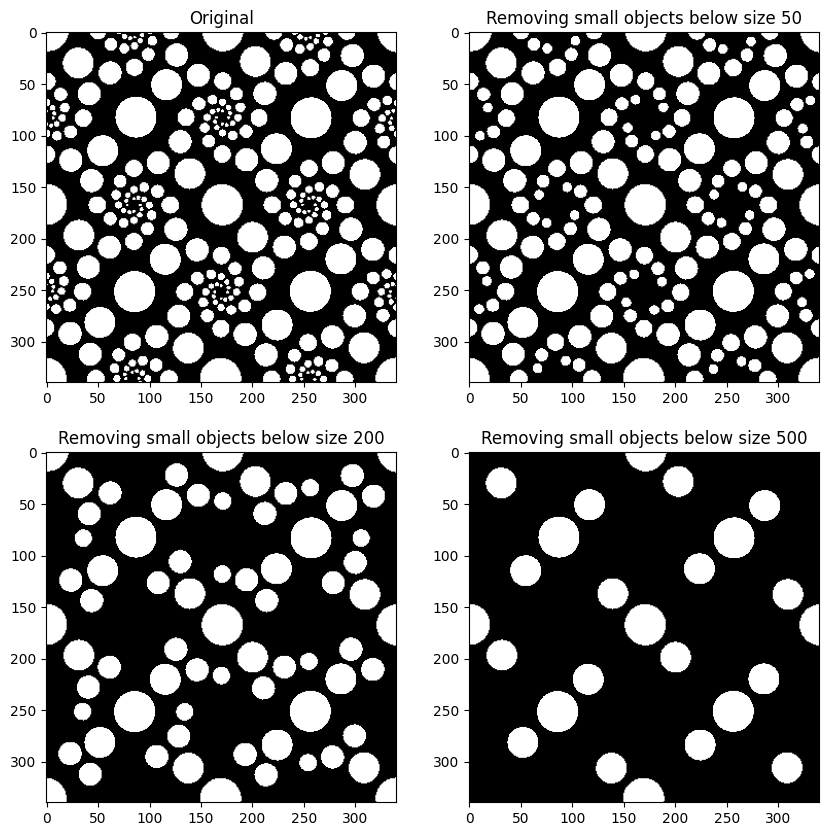

In [13]:
def plot_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)

img = cv.imread(path + 'circles.jpg', cv.IMREAD_GRAYSCALE)

_, binary = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

binary_bool = binary.astype(np.bool_)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plot_image(binary_bool, 'Original')

i = 2
for osz in [50, 200, 500]:
    processed_img = np.zeros_like(binary)

    contours, _ = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv.contourArea(contour)
        if area > osz:
            cv.drawContours(processed_img, [contour], -1, (255, 255, 255), thickness=cv.FILLED)

    plt.subplot(2, 2, i)
    plot_image(processed_img, f'Removing small objects below size {osz}')
    i += 1

plt.show()

## Ejercicio 5

Crea una clase que reciba una imagen binaria y que cuente con métodos para realizar las operaciones morfológicas que se han visto en clase.


In [14]:
class morphological_operations:

  def __init__(self, img, kernel= [3,3]):
    self.img = img
    self.kernel = np.ones((kernel[0], kernel[1]), np.uint8)

  def erosion(self):
    return cv.erode(self.img,self.kernel,iterations=1)

  def dilation(self):
    return cv.dilate(self.img, self.kernel, iterations=1)

  def opening(self):
    return cv.morphologyEx(self.img, cv.MORPH_OPEN, self.kernel)

  def closing(self):
    return cv.morphologyEx(self.img, cv.MORPH_CLOSE, self.kernel)

  def tophat(self):
    return cv.morphologyEx(self.img, cv.MORPH_TOPHAT, self.kernel)

  def blackhat(self):
    return cv.morphologyEx(self.img, cv.MORPH_BLACKHAT, self.kernel)

  def morph_gradient(self):
    return cv.morphologyEx(self.img, cv.MORPH_GRADIENT, kernel)

  def morph_laplace(self):
    dilatacion = cv.dilate(self.img, kernel, iterations=1)
    erosion = cv.erode(self.img, kernel, iterations=1)
    return dilatacion - erosion

  def median(self, median):
    noisy_img = self.img.astype(np.uint8)
    return cv.medianBlur(noisy_img, median)

  def clahe(self):
    img_uint8 = self.img.astype(np.uint8)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    imagen_clahe = clahe.apply(img_uint8)

    return imagen_clahe.astype('float32') / 255


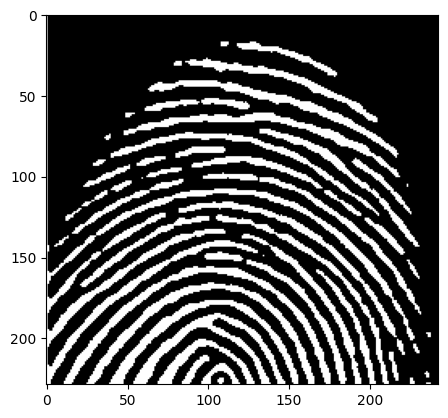

In [15]:
im = rgb2gray(imread(path+'fingerprint.jpg'))
im[im <= 0.5] = 0
im[im > 0.5] = 1

x = morphological_operations(im)
e = x.median(5)
pylab.imshow(e, cmap="gray")